# Fuel Shortage

In [195]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

In [211]:
plt.style.use('../mds.mplstyle')

## Fuel Reserves

Our data is sourced from the MRPAM website here: https://mrpam.gov.mn/article/169/

I went through each monthly report and grabed the numbers from page 25 on each report. The numbers listed are in tons.

In [225]:
df = pd.read_csv('fuel-reserves.csv', thousands=",")
df.head()

,date,80,92,95,diesel,jet
0,01-31-2019,11705.0,30963.0,5336.0,57690.3,1675.0
1,02-28-2019,13289.5,36414.5,5797.0,83303.8,1903.0
2,03-31-2019,13230.0,38936.0,6388.8,88160.0,2567.8
3,04-30-2019,13258.8,41791.0,6005.0,79821.0,2278.4
4,05-31-2019,13060.8,47588.0,5629.0,65069.3,2321.0


In [226]:
df.dtypes

date       object
80        float64
92        float64
95        float64
diesel    float64
jet       float64
dtype: object

In [227]:
df['date'] = pd.to_datetime(df['date'])

In [228]:
df['month'] = df['date'].dt.month

In [229]:
fuel92 = df[df['date'] < '01-01-2020'][['month','92']].rename(columns={'92':'2019'})

In [230]:
fuel92.head()

,month,2019
0,1,30963.0
1,2,36414.5
2,3,38936.0
3,4,41791.0
4,5,47588.0


In [231]:
fuel92['2020'] = df[(df['date'] > '01-01-2020') & (df['date'] < '01-01-2021')][['92']].reset_index(drop=True)

In [232]:
fuel92['2021'] = df[df['date'] > '01-01-2021'][['92']].reset_index(drop=True)

In [233]:
fuel92

,month,2019,2020,2021
0,1,30963.0,50160.0,56802.0
1,2,36414.5,44887.0,59764.0
2,3,38936.0,42756.0,50965.0
3,4,41791.0,42577.0,47774.0
4,5,47588.0,47350.0,41867.0
5,6,43931.3,51957.0,33848.0
6,7,41848.0,47595.0,NaN
7,8,48796.0,38584.0,NaN
8,9,44138.3,32487.0,NaN
9,10,35944.0,18826.0,NaN


In [234]:
fuel92['month'] = fuel92['month'].apply(lambda x: calendar.month_abbr[x])

## Visualize AI92 Supply

/var/folders/h6/t5s_1mjx40z0hhvtvsf11xf00000gn/T/ipykernel_62756/3188763318.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","10,000", "20,000", "30,000", "40,000", "50,000", "60,000", "70,000"])


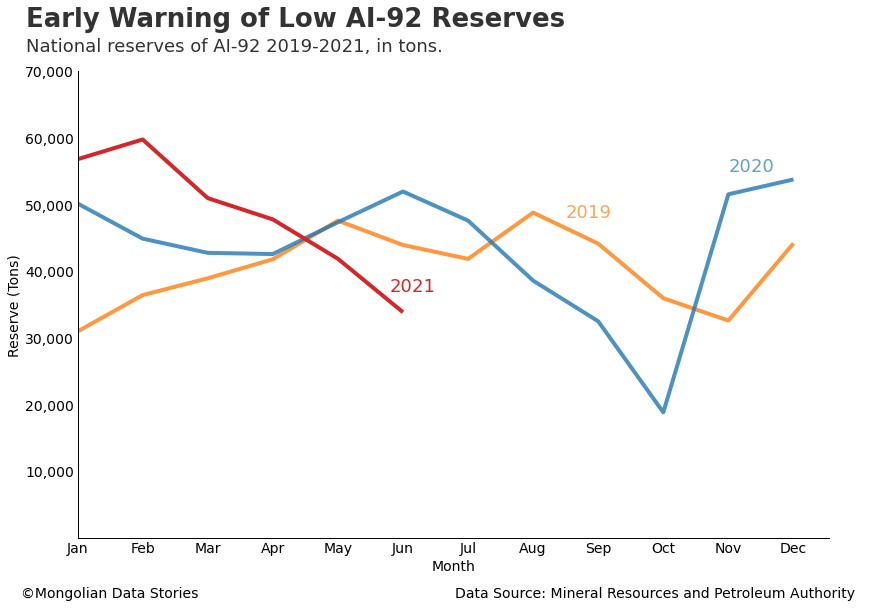

In [737]:
fig, ax = plt.subplots()

# Plot data and label axes
ax.plot(fuel92['month'], fuel92['2019'], label='2019', color='tab:orange', alpha=.8)
ax.plot(fuel92['month'], fuel92['2020'], label='2020', color='tab:blue', alpha=.8)
ax.plot(fuel92['month'], fuel92['2021'], label='2021', color='tab:red')
ax.set_xlabel('Month')
ax.set_ylabel("Reserve (Tons)")
ax.set_ylim(top=70000, bottom=0)
ax.set_xlim(left=0)

# Set custom yticks
ax.set_yticklabels(["","10,000", "20,000", "30,000", "40,000", "50,000", "60,000", "70,000"])

# Set Spines
ax.spines.left.set_position(('data', 0))
ax.spines.bottom.set_position(('data', 0))

# Add annotations
ax.text(x = 7.5, y=48000, s='2019', fontsize = 18, color='tab:orange', alpha=0.7)
ax.text(x = 10, y=55000, s='2020', fontsize = 18, color='tab:blue', alpha=0.7)
ax.text(x = 4.8, y=37000, s='2021', fontsize = 18, color='tab:red')

# Title and subtitle
ax.text(x = -.8, y = 76700, s = 'Early Warning of Low AI-92 Reserves', fontsize=26, weight='bold', alpha=.8)
ax.text(x = -.8, y = 73000, s = 'National reserves of AI-92 2019-2021, in tons.', fontsize=18, alpha=.8)

# Set bottom banner
ax.text(x = -1, y = -9000, s = '  ©Mongolian Data Stories                                                         Data Source: Mineral Resources and Petroleum Authority  ', fontsize = 14, )


plt.savefig('92-supply.png', dpi = 300, bbox_inches="tight")

## Fuel Consumption

In [743]:
imports = pd.read_csv("92-projection.csv", thousands=",")

In [744]:
imports.head()

,date,92_reserves,92_imports,esimated_usage,75_per_imports,85_per_imports,95_per_imports,92_reserves_75,92_reserves_85,92_reserves_95,92_reserves_100
0,01-31-2019,30963.0,51032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-28-2019,36414.5,33815.0,28363.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03-31-2019,38936.0,40407.0,37885.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04-30-2019,41791.0,35288.0,32433.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05-31-2019,47588.0,28940.0,23143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To extrapolate forward I assume that fuel imports are **a percentage of their 2020 level for July, August, and September 2021**. We will evaluate 75, 85, and 95% levels. Then we assume the usage from July 2020-December 2020. Projecting forward we can see what the situation looks like in this situation. 

$Last Month Reserve + This Month Import - This Month Reserve$

#### Interpolate Using Assumed Data

To interpolate our reserve numbers we can take the last month of reserves minus the usage, plus the imports. This has to be done one month at a time to generate input for the next month.

$Last Month Reserve - This Month Usage + This Month Imports$

To make things simpler I did these calculations in Excel.

/var/folders/h6/t5s_1mjx40z0hhvtvsf11xf00000gn/T/ipykernel_62756/550665123.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["","10,000", "20,000", "30,000", "40,000", "50,000", "60,000", "70,000"])


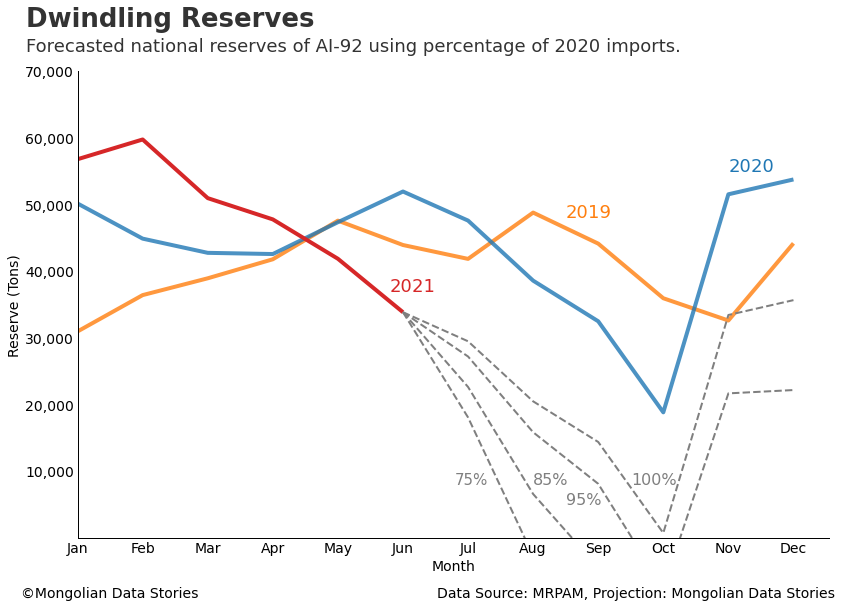

In [757]:
fig, ax = plt.subplots()

# Plot data and label axes
ax.plot(fuel92['month'], fuel92['2019'], label='2019', color='tab:orange', alpha=.8)
ax.plot(fuel92['month'], fuel92['2020'], label='2020', color='tab:blue', alpha=.8)
ax.plot(fuel92['month'], fuel92['2021'], label='2021', color='tab:red')
ax.plot(fuel92['month'][5:], imports.loc[29:]['92_reserves_75'], '--', label='75 percent level', color='tab:gray', linewidth=2)
ax.plot(fuel92['month'][5:], imports.loc[29:]['92_reserves_85'], '--', label='85 percent level', color='tab:gray', linewidth=2)
ax.plot(fuel92['month'][5:], imports.loc[29:]['92_reserves_95'], '--', label='95 percent level', color='tab:gray', linewidth=2)
ax.plot(fuel92['month'][5:], imports.loc[29:]['92_reserves_100'], '--', label='95 percent level', color='tab:gray', linewidth=2)
ax.set_xlabel('Month')
ax.set_ylabel("Reserve (Tons)")
ax.set_ylim(top=70000, bottom=0)
ax.set_xlim(left=0)

# Set custom yticks
ax.set_yticklabels(["","10,000", "20,000", "30,000", "40,000", "50,000", "60,000", "70,000"])

# Set Spines
ax.spines.left.set_position(('data', 0))
ax.spines.bottom.set_position(('data', 0))

# Add annotations
ax.text(x = 7.5, y=48000, s='2019', fontsize = 18, color='tab:orange')
ax.text(x = 10, y=55000, s='2020', fontsize = 18, color='tab:blue')
ax.text(x = 4.8, y=37000, s='2021', fontsize = 18, color='tab:red')
ax.text(x = 5.8, y=8000, s='75%', fontsize = 15, color='tab:gray')
ax.text(x = 7, y=8000, s='85%', fontsize = 16, color='tab:gray')
ax.text(x = 7.5, y=5000, s='95%', fontsize = 16, color='tab:gray')
ax.text(x = 8.5, y=8000, s='100%', fontsize = 16, color='tab:gray')

# Title and subtitle
ax.text(x = -.8, y = 76700, s = 'Dwindling Reserves', fontsize=26, weight='bold', alpha=.8)
ax.text(x = -.8, y = 73000, s = 'Forecasted national reserves of AI-92 using percentage of 2020 imports.', fontsize=18, alpha=.8)

# Set bottom banner
ax.text(x = -1, y = -9000, s = '  ©Mongolian Data Stories                                                     Data Source: MRPAM, Projection: Mongolian Data Stories  ', fontsize = 14, )


plt.savefig('projected-92-reserves.png', dpi = 300, bbox_inches="tight")